In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import cycler
from scipy.stats import gaussian_kde

In [12]:
plt.rc('axes',labelsize=24)
plt.rc('axes', axisbelow=True)
plt.rc('xtick',labelsize=18)
plt.rc('ytick',labelsize=18)
plt.rc('font', family='STIXGeneral')
plt.rc('mathtext', fontset='stix')
plt.rc('legend', fontsize='14')

default_cycler = (cycler(color=['r', 'g', 'b', 'y']) +
                  cycler(linestyle=['-', '--', ':', '-.']))

plt.rc('lines', linewidth=4)
custom_cycler = (cycler(color=['c', 'm', 'y', 'k']) +
                 cycler(lw=[1, 2, 3, 4]))

plt.rc('axes', prop_cycle=custom_cycler)

data_file  = "../2024_data_charge.txt"

# Number of PVs = 15
# 8 HOM BOM signals
# 1 Charge signal
# 6 BPM (3 x BPM and 3 y BPM)
cnames = ['Timestamp',
          'BPMS:L0B:0183:FW:X_SLOW','Status1', 
          'BPMS:L0B:0183:FW:Y_SLOW','Status2',
          'BPMS:HTR:120:FW:X_SLOW', 'Status3',
            'BPMS:HTR:120:FW:Y_SLOW', 'Status4',
            'BPMS:GUNB:925:FW:X_SLOW','Status5',
            'BPMS:GUNB:925:FW:Y_SLOW',	'Status6',
            'SCOP:AMRF:RF01:AI_MEAS1',	'Status7',
            'SCOP:AMRF:RF01:AI_MEAS2',	'Status8',
            'SCOP:AMRF:RF01:AI_MEAS3',	'Status9',
            'SCOP:AMRF:RF01:AI_MEAS4',	'Status10',
            'SCOP:AMRF:RF03:AI_MEAS1',	'Status11',
            'SCOP:AMRF:RF03:AI_MEAS2', 'Status12',
            'SCOP:AMRF:RF03:AI_MEAS3',	'Status13',	
            'SCOP:AMRF:RF03:AI_MEAS4',	'Status14',	
            'TORO:GUNB:360:CHRG',	'Status15',	'blah'
]
plot_names = ['Timestamp',
          'CM BPM X','Status1', 
          'CM BPM Y','Status2',
          'HTR BPM X', 'Status3',
            'HTR BPM Y', 'Status4',
            'GUN BPM X','Status5',
            'GUN BPM Y',	'Status6',
            'HOM C1',	'Status7',
            'HOM C2',	'Status8',
            'HOM C3',	'Status9',
            'HOM C4',	'Status10',
            'HOM C5',	'Status11',
            'HOM C6', 'Status12',
            'HOM C7',	'Status13',	
            'HOM C8',	'Status14',	
            'Charge',	'Status15',	'blah'
]

drops = np.arange(3, 46, 3)
df = pd.read_csv(data_file, sep='\t', skiprows=100, header=None)#, names=cnames)

new_df    = df[~df[2].str.contains('INVALID', na=False)]
new_names = list(new_df.columns.values) 
drop_df   = new_df.drop(df.columns[drops], axis=1)
drop_df.columns = plot_names #cnames
drop_names = list(drop_df.columns.values)

charge = drop_df["Charge"]
hom1   = drop_df["HOM C1"]
hom2   = drop_df["HOM C2"]
hom3   = drop_df["HOM C3"]
hom4   = drop_df["HOM C4"]
hom5   = drop_df["HOM C5"]
hom6   = drop_df["HOM C6"]
hom7   = drop_df["HOM C7"]
hom8   = drop_df["HOM C8"]
bpm_gunx = drop_df['GUN BPM X']
bpm_guny = drop_df['GUN BPM Y']
bpm_cmx  = drop_df['CM BPM X']
bpm_cmy  = drop_df['CM BPM Y']
time = drop_df['Timestamp']

def get_timestamps(df, timestart, timestop):
    mask = df['Timestamp'].str.startswith(timestart) | df['Timestamp'].str.startswith(timestop)
    return  df[mask]


In [13]:
#Shorten data
df_short = get_timestamps(drop_df, '02/24/2024 16', '02/24/2024 20')
df_short.head(10)

,Timestamp,CM BPM X,Status1,CM BPM Y,Status2,HTR BPM X,Status3,HTR BPM Y,Status4,GUN BPM X,...,Status11,HOM C6,Status12,HOM C7,Status13,HOM C8,Status14,Charge,Status15,blah
2503,02/24/2024 16:30:00.0,-0.176743,NO ALARM,0.271957,NO ALARM,-0.007169,NO ALARM,0.403830,NO ALARM,-0.314225,...,NO ALARM,-0.221,NO ALARM,-0.237,NO ALARM,-0.229,NO ALARM,157.124237,NO ALARM,NaN
2504,02/24/2024 16:30:00.0,-0.176743,NO ALARM,0.226135,NO ALARM,-0.007169,NO ALARM,0.403830,NO ALARM,-0.314225,...,NO ALARM,-0.221,NO ALARM,-0.237,NO ALARM,-0.229,NO ALARM,157.124237,NO ALARM,NaN
2505,02/24/2024 16:30:00.0,-0.176743,NO ALARM,0.226135,NO ALARM,-0.030533,NO ALARM,0.403830,NO ALARM,-0.314225,...,NO ALARM,-0.221,NO ALARM,-0.237,NO ALARM,-0.229,NO ALARM,157.124237,NO ALARM,NaN
2506,02/24/2024 16:30:00.0,-0.176743,NO ALARM,0.226135,NO ALARM,-0.030533,NO ALARM,0.370642,NO ALARM,-0.314225,...,NO ALARM,-0.221,NO ALARM,-0.237,NO ALARM,-0.229,NO ALARM,157.124237,NO ALARM,NaN
2507,02/24/2024 16:30:00.0,-0.176743,NO ALARM,0.226135,NO ALARM,-0.030533,NO ALARM,0.370642,NO ALARM,-0.275448,...,NO ALARM,-0.221,NO ALARM,-0.237,NO ALARM,-0.229,NO ALARM,157.124237,NO ALARM,NaN
2508,02/24/2024 16:30:00.0,-0.176743,NO ALARM,0.226135,NO ALARM,-0.030533,NO ALARM,0.370642,NO ALARM,-0.275448,...,NO ALARM,-0.221,NO ALARM,-0.237,NO ALARM,-0.229,NO ALARM,157.124237,NO ALARM,NaN
2509,02/24/2024 16:30:00.0,-0.176743,NO ALARM,0.226135,NO ALARM,-0.030533,NO ALARM,0.370642,NO ALARM,-0.275448,...,NO ALARM,-0.221,NO ALARM,-0.237,NO ALARM,-0.229,NO ALARM,157.124237,NO ALARM,NaN
2510,02/24/2024 16:30:00.0,-0.176743,NO ALARM,0.226135,NO ALARM,-0.030533,NO ALARM,0.370642,NO ALARM,-0.275448,...,NO ALARM,-0.221,NO ALARM,-0.237,NO ALARM,-0.229,NO ALARM,157.124237,NO ALARM,NaN
2511,02/24/2024 16:30:00.0,-0.176743,NO ALARM,0.226135,NO ALARM,-0.030533,NO ALARM,0.370642,NO ALARM,-0.275448,...,NO ALARM,-0.221,NO ALARM,-0.237,NO ALARM,-0.229,NO ALARM,157.124237,NO ALARM,NaN
2512,02/24/2024 16:30:00.0,-0.176743,NO ALARM,0.226135,NO ALARM,-0.030533,NO ALARM,0.370642,NO ALARM,-0.275448,...,NO ALARM,-0.221,NO ALARM,-0.237,NO ALARM,-0.229,NO ALARM,157.124237,NO ALARM,NaN


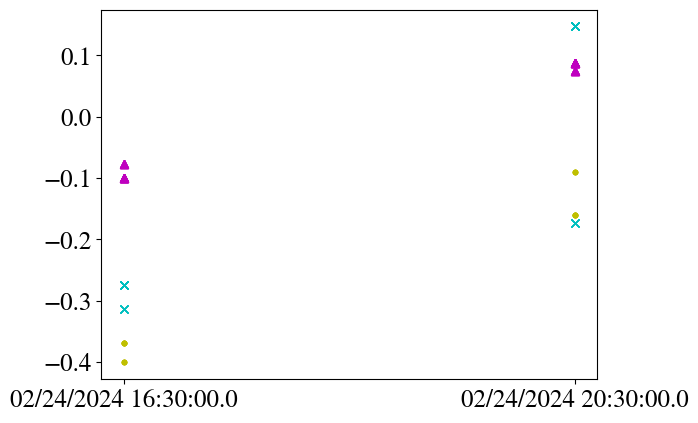

In [14]:
# FJD HOM 1 signal vs. bpm
short_time = df_short['Timestamp']
short_gunbpmx = df_short['GUN BPM X']
short_gunbpmy = df_short['GUN BPM Y']
short_hom1 = df_short['HOM C1']
plt.plot(short_time, short_gunbpmx, 'x', label='Gun BPM x')
plt.plot(short_time, short_gunbpmy, '^', label='Gun BPM y')
plt.plot(short_time, short_hom1, '.', label='Gun BPM x')
plt.show()